<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module2/Uniform_Cost_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uniform Cost Search (UCS)**

* A search algorithm used for finding the least cost path in a graph.
* It is a variant of Dijkstra's algorithm and is particularly useful when all edges of the graph have different weights (edge costs), and the goal is to find the path with the minimum total cost from a start node to a goal node.

* Unlike other search algorithms like Breadth-First Search (BFS), UCS takes into account the cost of each path, making it suitable for **weighted graphs** where each edge has a different cost.

* UCS uses a **priority queue** to store nodes. The node with the lowest cumulative cost is expanded first. This ensures that the search explores the most promising paths first.

In [1]:
# See https://docs.python.org/3/library/heapq.html

import heapq

# Create an empty list to use as a heap
heap = []

# Push some elements (they get ordered automatically)
heapq.heappush(heap, 5)
heapq.heappush(heap, 2)
heapq.heappush(heap, 9)
heapq.heappush(heap, 1)

print("Heap:", heap)  # Internal structure (not necessarily sorted list)

# Pop elements (always smallest comes out first)
print("Popped:", heapq.heappop(heap))  # 1
print("Popped:", heapq.heappop(heap))  # 2
print("Heap after pops:", heap)
print("------------")


# Create an empty list to use as a heap
heap = []

# Add nodes with associated priority (e.g., cost)
heapq.heappush(heap, (10, 'A'))
heapq.heappush(heap, (5, 'B'))
heapq.heappush(heap, (7, 'C'))

# Always pops the one with the lowest priority value
print(heapq.heappop(heap))  # (5, 'B')
print(heapq.heappop(heap))  # (7, 'C')
print(heapq.heappop(heap))  # (10, 'A')

Heap: [1, 2, 9, 5]
Popped: 1
Popped: 2
Heap after pops: [5, 9]
------------
(5, 'B')
(7, 'C')
(10, 'A')


In [2]:
# See https://docs.python.org/3/library/heapq.html

import heapq

def UCS(graph, root, costs, goal=None):

    # Priority queue (min-heap) where each element is (cost, node)
    pq = [(0, root)]  # Start with root at cost 0
    visited = {}  # Dictionary to track the minimum cost to reach each node

    while pq:
        # Pop the node with the lowest cost
        current_cost, vertex = heapq.heappop(pq)

        # If this node has already been visited with a cheaper path, skip it
        if vertex in visited and visited[vertex] <= current_cost:
            continue

        # Mark this node as visited with the current cost
        visited[vertex] = current_cost
        print(f"Visiting: {vertex}, Cost: {current_cost}")

        # If we found the goal, we can stop
        if vertex == goal:
            print(f"Goal {goal} found with cost: {current_cost}")
            break

        # Explore neighbors
        for neighbor in graph[vertex]:
            new_cost = current_cost + costs.get((vertex, neighbor), 1)  # Default cost is 1 if not given
            if neighbor not in visited or new_cost < visited.get(neighbor, float('inf')):
                heapq.heappush(pq, (new_cost, neighbor))  # Push with the new cost

Diagram drawn on https://app.diagrams.net/

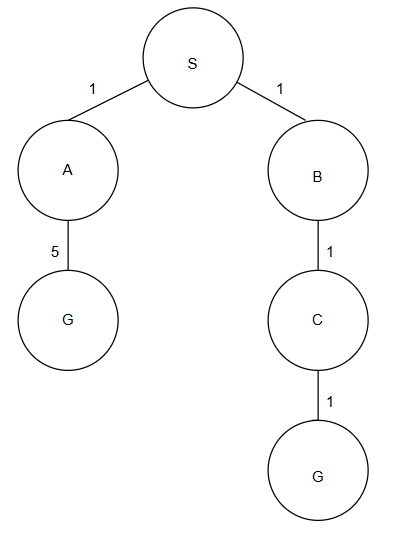

In [3]:
# A simple graph
graph1 = {
    'S': ['A', 'B'],
    'A': ['G'],
    'B': ['C'],
    'C': ['G'],
}

# Cost dictionary for edges
costs1 = {
    ('S', 'A'): 1, ('S', 'B'): 1,
    ('A', 'G'): 5,
    ('B', 'C'): 1,
    ('C', 'G'): 1,
}

In [4]:
# Example usage
UCS(graph1, 'S', costs1, goal='G')

Visiting: S, Cost: 0
Visiting: A, Cost: 1
Visiting: B, Cost: 1
Visiting: C, Cost: 2
Visiting: G, Cost: 3
Goal G found with cost: 3


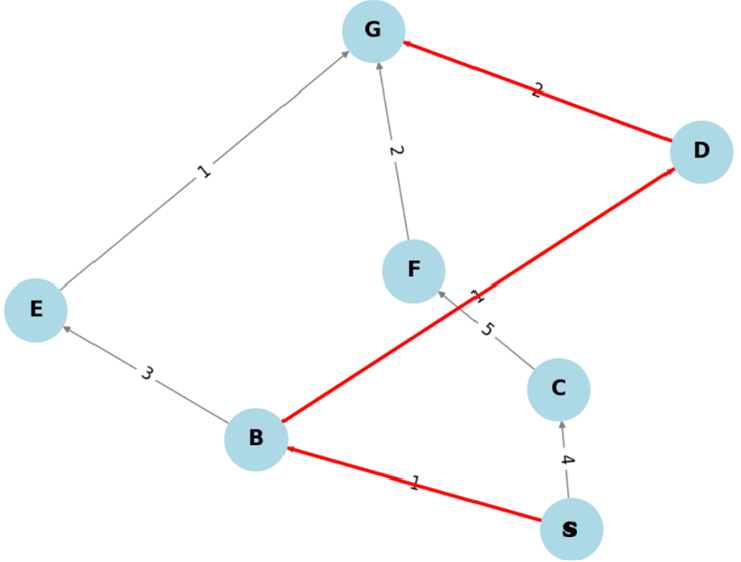

In [5]:
# A more elaborate graph
graph2 = {
    'S': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['G'],
    'E': ['G'],
    'F': ['G']
}

# Cost dictionary for edges
costs2 = {
    ('S', 'B'): 1,
    ('S', 'C'): 4,
    ('B', 'D'): 1,
    ('B', 'E'): 3,
    ('C', 'F'): 5,
    ('D', 'G'): 2,
    ('E', 'G'): 1,
    ('F', 'G'): 2
}

In [6]:
# Example usage

# Least cost path: S -> B -> D -> G with total cost 4
UCS(graph2, 'S', costs2, goal='G')

Visiting: S, Cost: 0
Visiting: B, Cost: 1
Visiting: D, Cost: 2
Visiting: C, Cost: 4
Visiting: E, Cost: 4
Visiting: G, Cost: 4
Goal G found with cost: 4
